<a href="https://colab.research.google.com/github/amandaaalmei/Analise-Explorat-ria-Airbnb/blob/main/case_gb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [4]:
# Importando as bases de dados
df_base1 = pd.read_csv('/content/Base_1.csv')
df_base2 = pd.read_csv('/content/base_2.csv')

In [5]:
# Mergeando df_base1 e df_base2
df = pd.merge(df_base1, df_base2, on='ID_PEDIDO', how='inner')
print(df.head())

   ID_PEDIDO      MARCA   VALOR          DATA_PEDIDO  UF BANDEIRA   EMISSOR  \
0         35  BOTICARIO  200,07  01/01/2024 10:38:34  MG      ELO      ITAU   
1        508  BOTICARIO   276,7  01/01/2024 11:50:23  MG   MASTER  BRADESCO   
2        878  BOTICARIO  166,81  01/01/2024 14:19:53  MG     VISA    NUBANK   
3        863  BOTICARIO  219,87  01/01/2024 16:03:35  RS     VISA      ITAU   
4        950  BOTICARIO   209,9  01/01/2024 17:32:40  SP   MASTER    NUBANK   

    TIPO_ENTREGA  CHARGEBACK CANAL_VENDA  
0        ENTREGA           0        SITE  
1  CLIQUE RETIRE           0        SITE  
2  CLIQUE RETIRE           0        SITE  
3  CLIQUE RETIRE           0        SITE  
4  CLIQUE RETIRE           0        SITE  


In [6]:
df

,ID_PEDIDO,MARCA,VALOR,DATA_PEDIDO,UF,BANDEIRA,EMISSOR,TIPO_ENTREGA,CHARGEBACK,CANAL_VENDA
0,35,BOTICARIO,"200,07",01/01/2024 10:38:34,MG,ELO,ITAU,ENTREGA,0,SITE
1,508,BOTICARIO,"276,7",01/01/2024 11:50:23,MG,MASTER,BRADESCO,CLIQUE RETIRE,0,SITE
2,878,BOTICARIO,"166,81",01/01/2024 14:19:53,MG,VISA,NUBANK,CLIQUE RETIRE,0,SITE
3,863,BOTICARIO,"219,87",01/01/2024 16:03:35,RS,VISA,ITAU,CLIQUE RETIRE,0,SITE
4,950,BOTICARIO,"209,9",01/01/2024 17:32:40,SP,MASTER,NUBANK,CLIQUE RETIRE,0,SITE
...,...,...,...,...,...,...,...,...,...,...
995,374,BOTICARIO,"86,02",31/01/2024 23:22:53,CE,MASTER,ITAU,ENTREGA,0,APP
996,972,BOTICARIO,"123,08",31/01/2024 23:24:53,RJ,MASTER,NUBANK,CLIQUE RETIRE,0,APP
997,38,BOTICARIO,"67,99",31/01/2024 23:26:52,CE,MASTER,ITAU,ENTREGA,0,APP
998,160,EUDORA,"198,9",31/01/2024 23:37:50,SP,MASTER,NUBANK,ENTREGA,0,APP


In [7]:
df.dtypes

ID_PEDIDO        int64
MARCA           object
VALOR           object
DATA_PEDIDO     object
UF              object
BANDEIRA        object
EMISSOR         object
TIPO_ENTREGA    object
CHARGEBACK       int64
CANAL_VENDA     object
dtype: object

In [8]:
df.columns

Index(['ID_PEDIDO', 'MARCA', 'VALOR', 'DATA_PEDIDO', 'UF', 'BANDEIRA',
       'EMISSOR', 'TIPO_ENTREGA', 'CHARGEBACK', 'CANAL_VENDA'],
      dtype='object')

In [9]:
# Criando coluna hora e data
df['DATA_PEDIDO'] = pd.to_datetime(df['DATA_PEDIDO'])
df['DATA'] = df['DATA_PEDIDO'].dt.date
df['HORA'] = df['DATA_PEDIDO'].dt.time
df.head()

,ID_PEDIDO,MARCA,VALOR,DATA_PEDIDO,UF,BANDEIRA,EMISSOR,TIPO_ENTREGA,CHARGEBACK,CANAL_VENDA,DATA,HORA
0,35,BOTICARIO,"200,07",2024-01-01 10:38:34,MG,ELO,ITAU,ENTREGA,0,SITE,2024-01-01,10:38:34
1,508,BOTICARIO,"276,7",2024-01-01 11:50:23,MG,MASTER,BRADESCO,CLIQUE RETIRE,0,SITE,2024-01-01,11:50:23
2,878,BOTICARIO,"166,81",2024-01-01 14:19:53,MG,VISA,NUBANK,CLIQUE RETIRE,0,SITE,2024-01-01,14:19:53
3,863,BOTICARIO,"219,87",2024-01-01 16:03:35,RS,VISA,ITAU,CLIQUE RETIRE,0,SITE,2024-01-01,16:03:35
4,950,BOTICARIO,"209,9",2024-01-01 17:32:40,SP,MASTER,NUBANK,CLIQUE RETIRE,0,SITE,2024-01-01,17:32:40


In [10]:
# Analisando duplicadas e valores nulos

duplicadas = df.duplicated()
num_duplicadas = duplicadas.sum()
print(num_duplicadas)

0


In [11]:
df.isnull().sum()

ID_PEDIDO       0
MARCA           0
VALOR           0
DATA_PEDIDO     0
UF              0
BANDEIRA        0
EMISSOR         0
TIPO_ENTREGA    0
CHARGEBACK      0
CANAL_VENDA     0
DATA            0
HORA            0
dtype: int64

# Análise Exploratória

In [12]:
# Análise tipo_entrega
valores_unicos_tipos_entrega = df['TIPO_ENTREGA'].unique
print(valores_unicos_tipos_entrega)

<bound method Series.unique of 0            ENTREGA
1      CLIQUE RETIRE
2      CLIQUE RETIRE
3      CLIQUE RETIRE
4      CLIQUE RETIRE
           ...      
995          ENTREGA
996    CLIQUE RETIRE
997          ENTREGA
998          ENTREGA
999          ENTREGA
Name: TIPO_ENTREGA, Length: 1000, dtype: object>


In [13]:
# Análise canal_venda
valores_unicos_canal_venda = df['CANAL_VENDA'].unique
print(valores_unicos_canal_venda)

<bound method Series.unique of 0      SITE
1      SITE
2      SITE
3      SITE
4      SITE
       ... 
995     APP
996     APP
997     APP
998     APP
999     APP
Name: CANAL_VENDA, Length: 1000, dtype: object>


In [14]:
# Análise marca
valores_unicos_marca = df['MARCA'].unique
print(valores_unicos_marca)

<bound method Series.unique of 0      BOTICARIO
1      BOTICARIO
2      BOTICARIO
3      BOTICARIO
4      BOTICARIO
         ...    
995    BOTICARIO
996    BOTICARIO
997    BOTICARIO
998       EUDORA
999    BOTICARIO
Name: MARCA, Length: 1000, dtype: object>


In [15]:
print(df.columns)

Index(['ID_PEDIDO', 'MARCA', 'VALOR', 'DATA_PEDIDO', 'UF', 'BANDEIRA',
       'EMISSOR', 'TIPO_ENTREGA', 'CHARGEBACK', 'CANAL_VENDA', 'DATA', 'HORA'],
      dtype='object')


In [98]:
# Vendas totais
numero_total_vendas = len(df)

# Valor total
valor_total_vendas = df['VALOR'].sum()

# Chargeback
numero_total_chargebacks = df[df['CHARGEBACK'] == 1].shape[0]

# Valor chargeback
valor_total_chargebacks = df[df['CHARGEBACK'] == 1]['VALOR'].sum()

print(f'Número total de vendas: {numero_total_vendas}')
print(f'Número total de chargebacks: {numero_total_chargebacks}')
print(f'Valor total das vendas: {valor_total_vendas}')
print(f'Valor total de chargebacks: {valor_total_chargebacks}')

Número total de vendas: 1000
Número total de chargebacks: 51
Valor total das vendas: 4152.0
Valor total de chargebacks: 189.0


In [100]:
(51/1000)*100

5.1

In [103]:
# Calculando a porcentagem de chargebacks em relação ao valor total das vendas
chargeback_perc = (valor_total_chargebacks / valor_total_vendas) * 100

print(f'Porcentagem de chargebacks: {chargeback_perc:.2f}%')

Porcentagem de chargebacks: 4.55%


In [16]:
df['DATA_PEDIDO'] = pd.to_datetime(df['DATA_PEDIDO'])

# Extrair a hora de DATA_PEDIDO
df['HORA'] = df['DATA_PEDIDO'].dt.hour

# Criando uma nova coluna para dia da semana, ajustando para que a semana comece no domingo
df['SEMANA'] = df['DATA_PEDIDO'].dt.to_period('W-SUN')

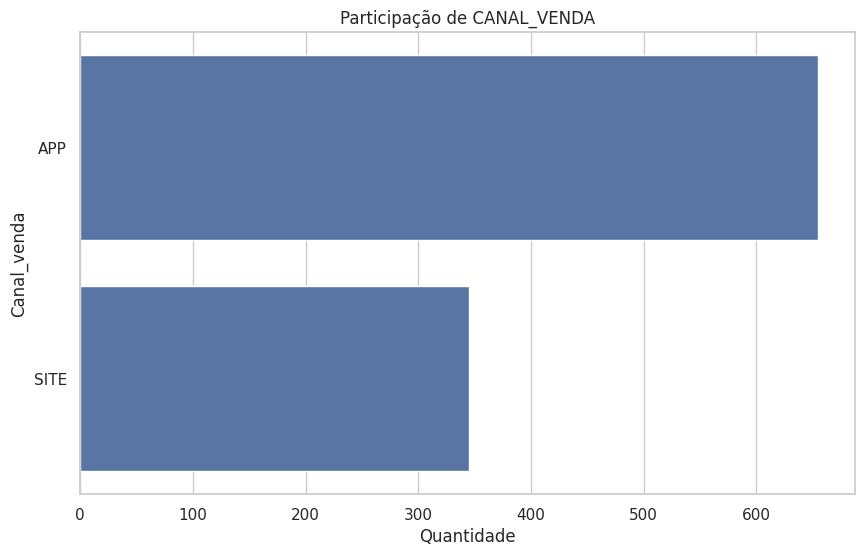

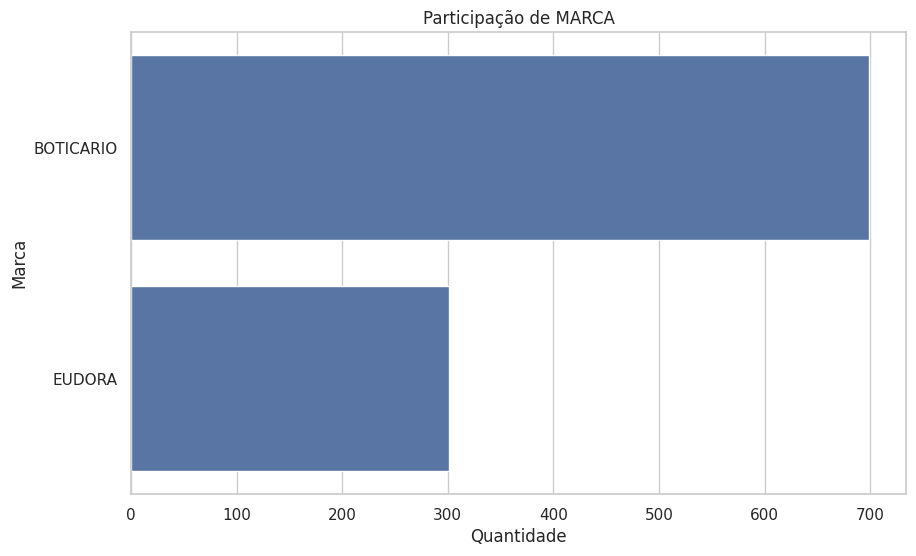

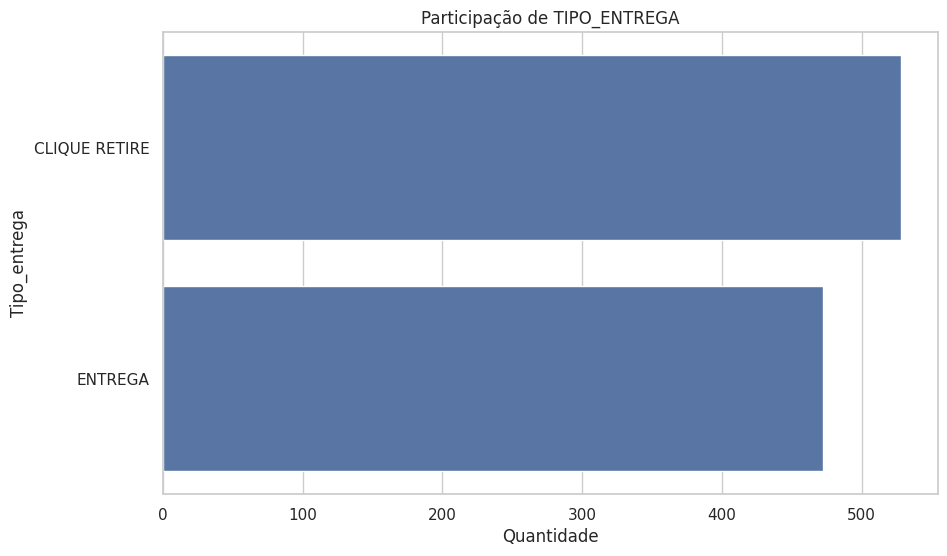

In [17]:
df['DATA_PEDIDO'] = pd.to_datetime(df['DATA_PEDIDO'])

# Criando uma nova coluna para dia da semana
df['SEMANA'] = df['DATA_PEDIDO'].dt.to_period('W-SUN')

# Agrupando e visualizando CANAL_VENDA, MARCA, TIPO_ENTREGA
for column in ['CANAL_VENDA', 'MARCA', 'TIPO_ENTREGA']:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Participação de {column}')
    plt.xlabel('Quantidade')
    plt.ylabel(column.capitalize())
    plt.show()



In [18]:
print(df.columns)

Index(['ID_PEDIDO', 'MARCA', 'VALOR', 'DATA_PEDIDO', 'UF', 'BANDEIRA',
       'EMISSOR', 'TIPO_ENTREGA', 'CHARGEBACK', 'CANAL_VENDA', 'DATA', 'HORA',
       'SEMANA'],
      dtype='object')


<ipython-input-19-201291d99dc7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chargeback['PERIODO_DO_DIA'] = pd.cut(df_chargeback['HORA'], bins=[0,6,12,18,24], labels=['Madrugada', 'Manhã', 'Tarde', 'Noite'], right=False)


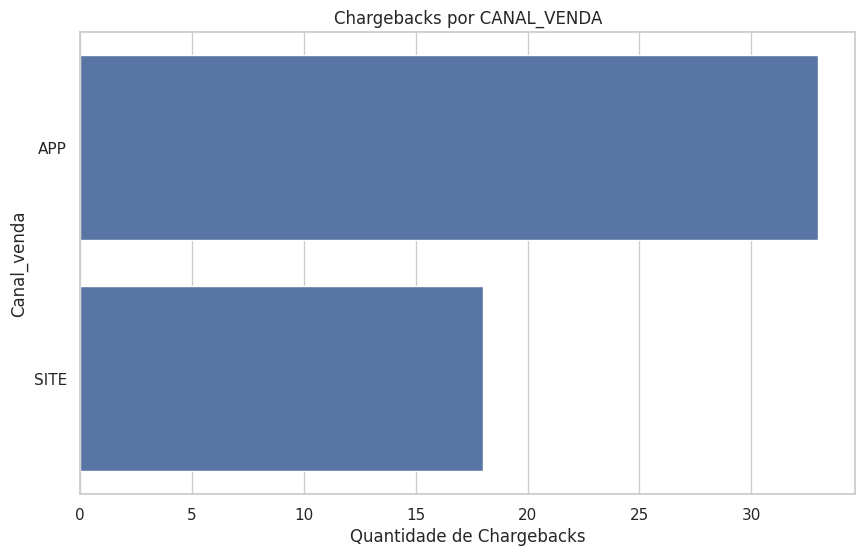

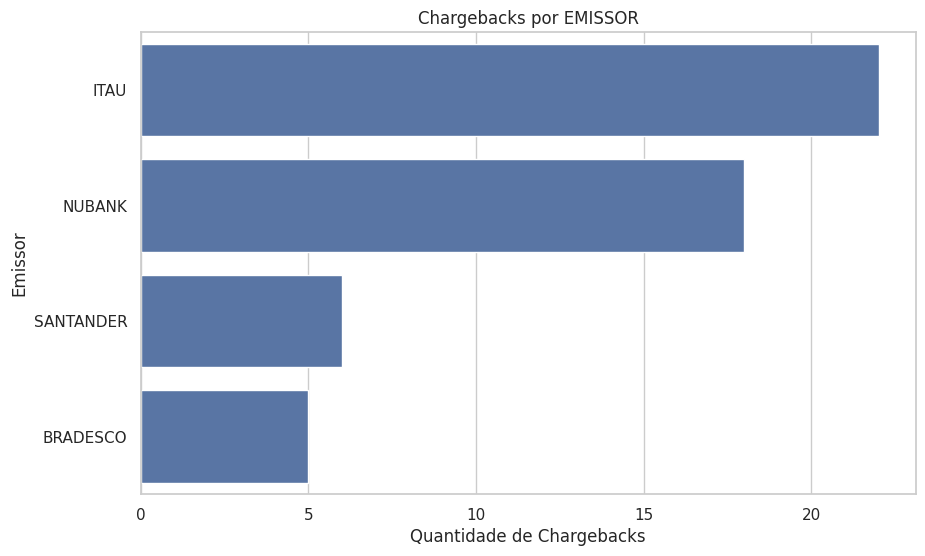

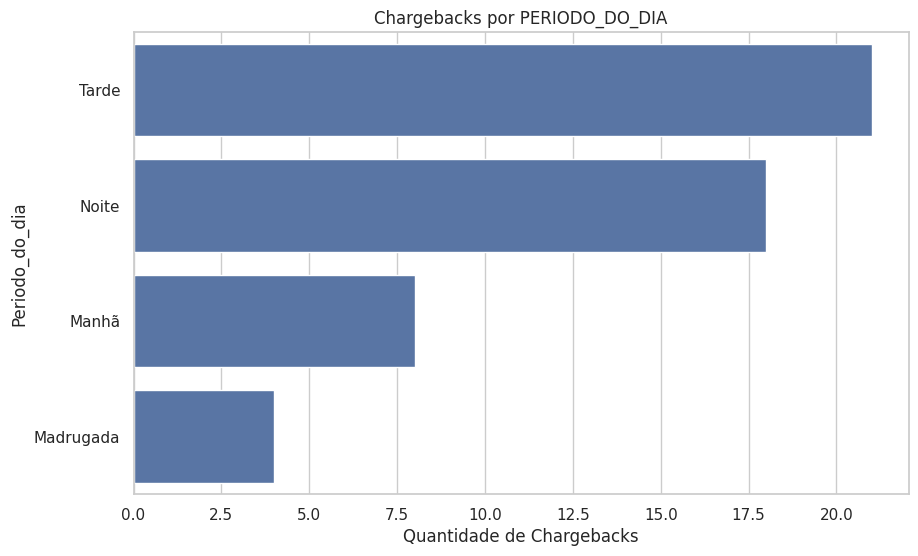

In [19]:
df_chargeback = df[df['CHARGEBACK'] == 1]

# Ajustando a hora
df_chargeback['PERIODO_DO_DIA'] = pd.cut(df_chargeback['HORA'], bins=[0,6,12,18,24], labels=['Madrugada', 'Manhã', 'Tarde', 'Noite'], right=False)

# Visualização
for column in ['CANAL_VENDA', 'EMISSOR', 'PERIODO_DO_DIA']:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df_chargeback, order=df_chargeback[column].value_counts().index)
    plt.title(f'Chargebacks por {column}')
    plt.xlabel('Quantidade de Chargebacks')
    plt.ylabel(column.capitalize())
    plt.show()


# Análise por região

In [20]:
UF_unico = df['UF'].unique()
listagem_UF_unico = list(UF_unico)

for UF in listagem_UF_unico:
    print(UF)

MG
RS
SP
GO
CE
RJ
RN
AM
MA
BA
DF
PA
AL
SC
PE
PR
SE
ES
PB
SPO
Alagoas
MT
PI
TO
AC
MS
SPS
RO
SPP
rji


Os dados contém informações apenas do Brasil, desse modo, há inconsistências no campo "UF", sendo necessário realizar padronização dos dados, as UF's que serão padronizadas são: AL, SP e RJ.

In [21]:
# Padronizando a coluna UF
substituicoes_uf = {
    'Alagoas': 'AL',
    'SPO': 'SP',
    'SPP': 'SP',
    'SPS': 'SP',
    'rji': 'RJ'
}

# Substituição
df['UF'] = df['UF'].replace(substituicoes_uf)

# Validação
print(df['UF'].unique())

['MG' 'RS' 'SP' 'GO' 'CE' 'RJ' 'RN' 'AM' 'MA' 'BA' 'DF' 'PA' 'AL' 'SC'
 'PE' 'PR' 'SE' 'ES' 'PB' 'MT' 'PI' 'TO' 'AC' 'MS' 'RO']


O passo seguinte consiste na visualização através de um gráfico de barras contendo o agrupamento dos pedidos por UF.

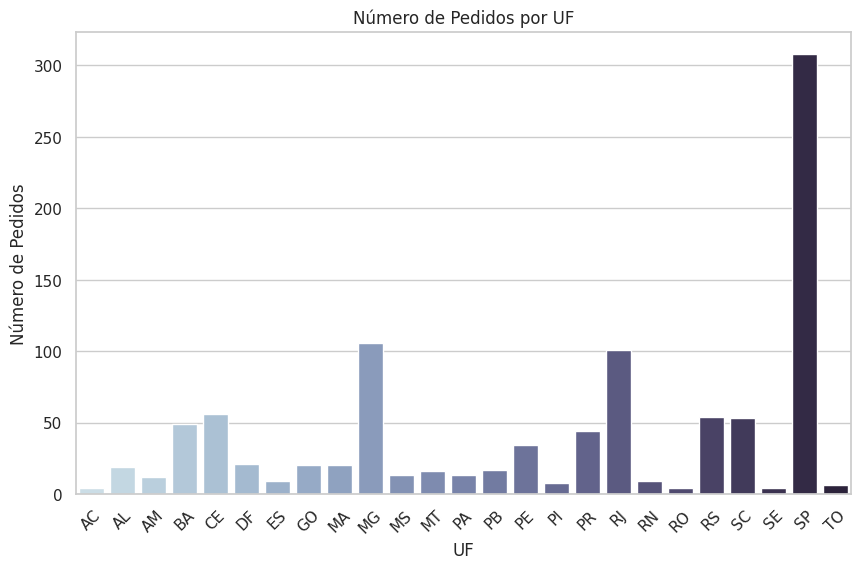

In [22]:
# Pedidos por região
pedidos_por_regiao = df.groupby('UF').size().reset_index(name='Número de Pedidos')

# Ordenando no gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='UF', y='Número de Pedidos', hue='UF', data=pedidos_por_regiao, palette='ch:s=.25,rot=-.25', legend=False)
plt.title('Número de Pedidos por UF')
plt.xlabel('UF')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45)
plt.show()

A maior concentração de pedidos foi na região Sudeste, com os 3 maiores Estados em relação ao número de pedidos: SP, RJ e MG. Na região sudeste o ES não performou bem no período em comparação com os demais.
Em seguida, temos o CE e RS complementando a lista dos 5 maiores estados em relação ao número de pedidos.

In [23]:
# Chargeback por região
chargeback_por_regiao = df[df['CHARGEBACK'] == 1].groupby('UF')['CHARGEBACK'].count().reset_index()

chargeback_por_regiao.columns = ['Região', 'Número de Ocorrências de Chargeback']

print(chargeback_por_regiao)

  Região  Número de Ocorrências de Chargeback
0     AM                                    1
1     BA                                    1
2     CE                                   15
3     GO                                    2
4     MS                                    1
5     PE                                    1
6     PR                                    2
7     RJ                                    1
8     SC                                    2
9     SP                                   25


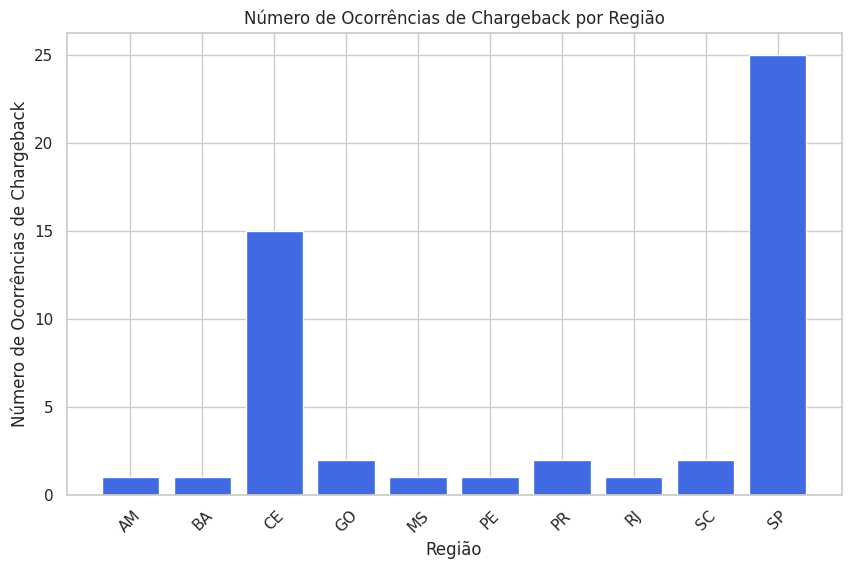

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(chargeback_por_regiao['Região'], chargeback_por_regiao['Número de Ocorrências de Chargeback'], color='royalblue')
plt.title('Número de Ocorrências de Chargeback por Região')
plt.xlabel('Região')
plt.ylabel('Número de Ocorrências de Chargeback')
plt.xticks(rotation=45)
plt.show()

O comportamento da categoria "Chargeback" seguiu conforme o esperado, constando o Estado de SP com o maior número de ocorrência e sendo seguido pelo Estado do CE, que estava entre os 5 maiores Estados em relação ao número de pedidos.

## Análise por turno e UF

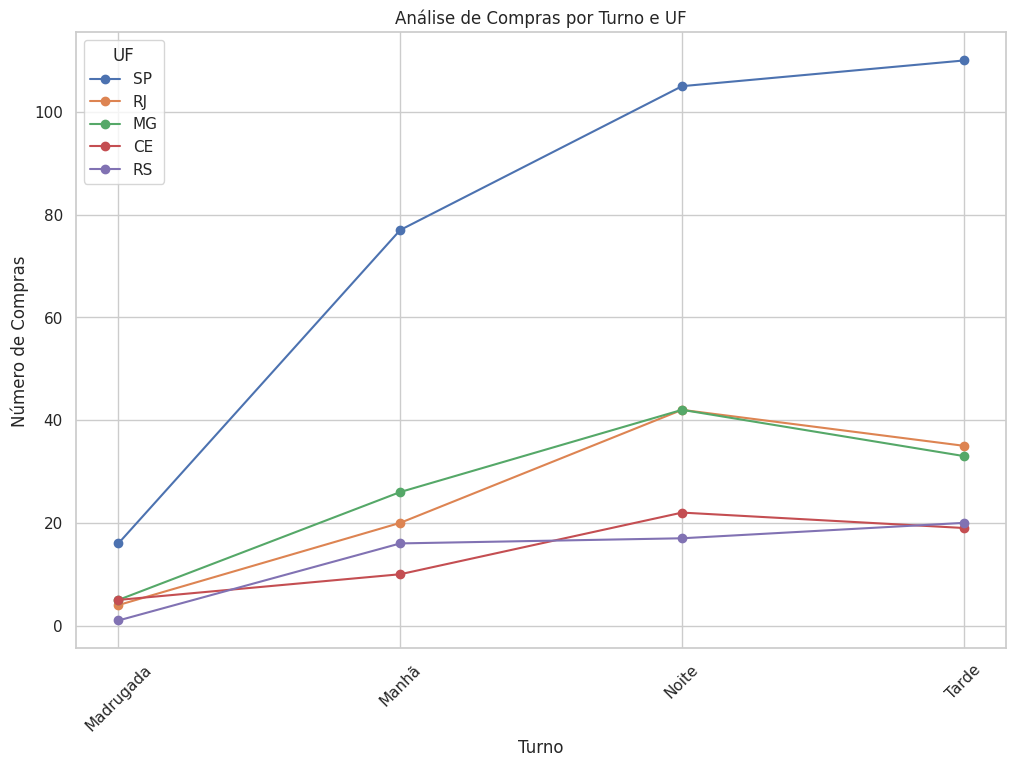

In [25]:
df['DATA_PEDIDO'] = pd.to_datetime(df['DATA_PEDIDO'])
df['HORA'] = df['DATA_PEDIDO'].dt.hour

# Organizando os dados por turno para melhorar a visualização
def classificar_turno(hora):
    if 6 <= hora < 12:
        return 'Manhã'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora <= 23:
        return 'Noite'
    else:
        return 'Madrugada'

df['TURNO'] = df['HORA'].apply(classificar_turno)

# Estados com o maior número de pedidos
maiores_ufs = ['SP', 'RJ', 'MG', 'CE', 'RS']
df_filtrado = df[df['UF'].isin(maiores_ufs)]

# Agrupando UF e turno
compras_por_uf_turno = df_filtrado.groupby(['UF', 'TURNO']).size().unstack(fill_value=0).T

# Gráfico de linhas UF x Turnos
plt.figure(figsize=(12, 8))

# Corrigindo o erro: Usando 'maiores_ufs' diretamente no loop
for uf in maiores_ufs:
    if uf in compras_por_uf_turno.columns:
        plt.plot(compras_por_uf_turno.index, compras_por_uf_turno[uf], label=uf, marker='o')

plt.title('Análise de Compras por Turno e UF')
plt.xlabel('Turno')
plt.ylabel('Número de Compras')
plt.legend(title='UF')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

O Estado de SP concentra o seu turno de compras no período da noite, assim como os estados RJ, MG e CE, enquanto isso o estado RS concentra as suas compras no período da tarde. Os demais estados apresentaram o 2º maior turno de compra sendo pela tarde.

<ipython-input-26-61db05294caf>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chargeback['TURNO'] = df_chargeback['DATA_PEDIDO'].dt.hour.apply(classificar_turno)


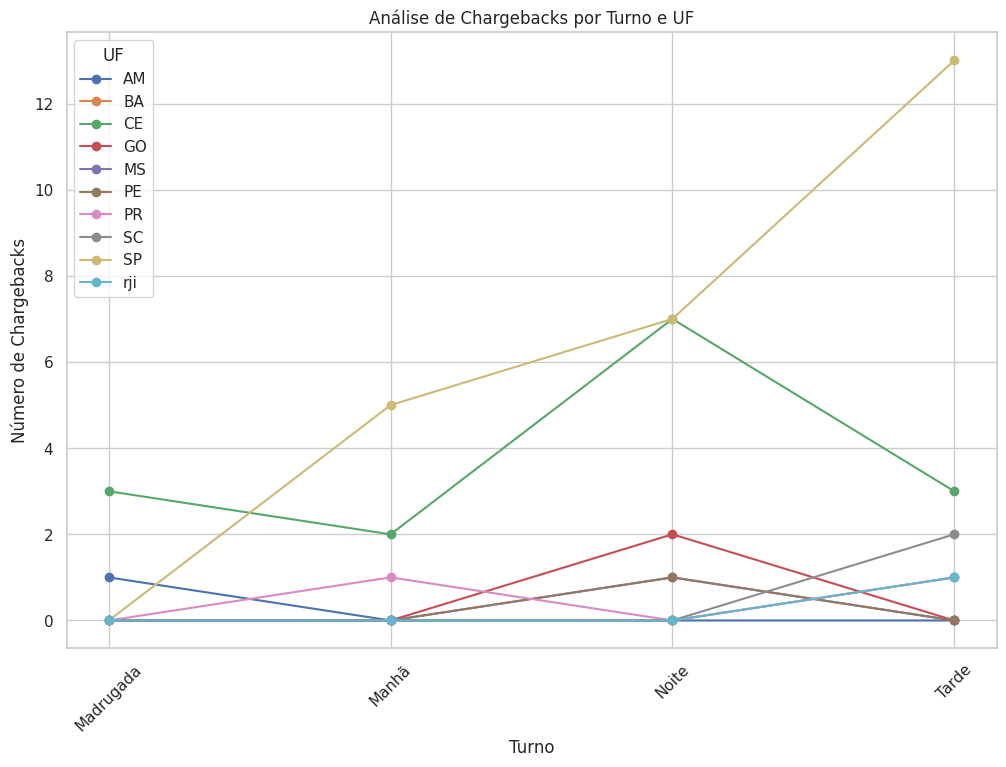

In [26]:
# Ajustando o df para o formato desejado de hora
df['DATA_PEDIDO'] = pd.to_datetime(df['DATA_PEDIDO'])
df['HORA'] = df['DATA_PEDIDO'].dt.hour

# Organizando os dados por turno para melhorar a visualização
def classificar_turno(hora):
    if 6 <= hora < 12:
        return 'Manhã'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora <= 23:
        return 'Noite'
    else:
        return 'Madrugada'

df['TURNO'] = df['HORA'].apply(classificar_turno)

# Aplicando a função para criar a coluna 'TURNO'
df_chargeback['TURNO'] = df_chargeback['DATA_PEDIDO'].dt.hour.apply(classificar_turno)

# Agrupando por UF e TURNO, e contando ocorrências de chargeback
chargeback_por_uf_turno = df_chargeback.groupby(['UF', 'TURNO']).size().unstack(fill_value=0).T

# Gráfico de linhas para análise de chargebacks por turno e UF
plt.figure(figsize=(12, 8))

# Criando uma linha para cada UF
for uf in chargeback_por_uf_turno.columns:
    plt.plot(chargeback_por_uf_turno.index, chargeback_por_uf_turno[uf], label=uf, marker='o')

plt.title('Análise de Chargebacks por Turno e UF')
plt.xlabel('Turno')
plt.ylabel('Número de Chargebacks')
plt.legend(title='UF')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [27]:
# Ajustando novamente a UF 'rji' para 'RJ', apresentou erro anteriormente
substituicoes_uf = {'rji': 'RJ'}
df['UF'] = df['UF'].replace(substituicoes_uf)

# Filtrando apenas registros com chargeback
df_chargeback = df[df['CHARGEBACK'] == 1]

# Defina a função classificar_turno caso não esteja definida
def classificar_turno(hora):
    if 6 <= hora < 12:
        return 'Manhã'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora <= 23:
        return 'Noite'
    else:
        return 'Madrugada'

# Organizando chargeback por turno
df_chargeback['TURNO'] = df_chargeback['DATA_PEDIDO'].dt.hour.apply(classificar_turno)

# Ocorrências de chargeback por UF e Turno
chargeback_por_uf_turno = df_chargeback.groupby(['UF', 'TURNO']).size().unstack(fill_value=0).transpose()

# Visualizando as ocorrências
print(chargeback_por_uf_turno)


UF         AM  BA  CE  GO  MS  PE  PR  RJ  SC  SP
TURNO                                            
Madrugada   1   0   3   0   0   0   0   0   0   0
Manhã       0   0   2   0   0   0   1   0   0   5
Noite       0   0   7   2   1   1   0   0   0   7
Tarde       0   1   3   0   0   0   1   1   2  13


<ipython-input-27-ea4ae1455a5a>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chargeback['TURNO'] = df_chargeback['DATA_PEDIDO'].dt.hour.apply(classificar_turno)


In [28]:
print(df['UF'].unique())

['MG' 'RS' 'SP' 'GO' 'CE' 'RJ' 'RN' 'AM' 'MA' 'BA' 'DF' 'PA' 'AL' 'SC'
 'PE' 'PR' 'SE' 'ES' 'PB' 'MT' 'PI' 'TO' 'AC' 'MS' 'RO']


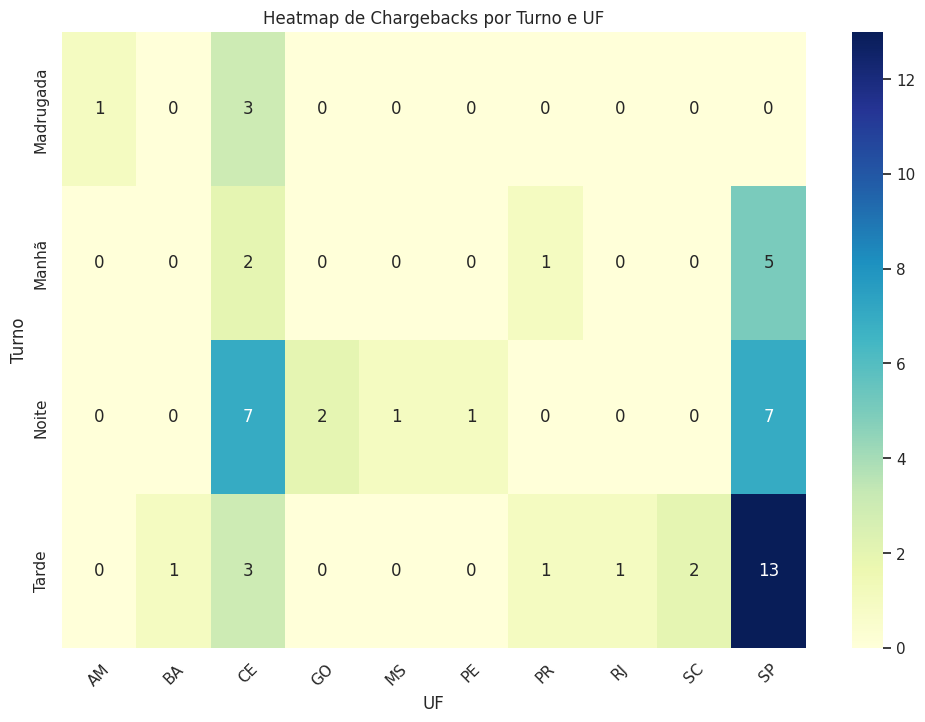

In [29]:
# Plotando o heatmap com as UFs atualizadas
plt.figure(figsize=(12, 8))
sns.heatmap(chargeback_por_uf_turno, annot=True, cmap="YlGnBu", fmt="d")

plt.title('Heatmap de Chargebacks por Turno e UF')
plt.xlabel('UF')
plt.ylabel('Turno')
plt.xticks(rotation=45)
plt.show()


Foi utilizado um mapa de calor constando as ocorrências do chargeback por turno para cada UF. Abaixo as principais informações:


*   O turno "madrugada" apresenta o menor número de ocorrências de chargeback no geral. Porém, é importante se atentar ao comportamento de compras para o Estado do CE;
*   O turno "manhã" concentra 8 ocorrências totais de chargeback, porém apresenta o maior número para o estado SP;
*   O turno "tarde" concentra o maior número de chargeback, sendo um horário crítico no Estado SP;
*   O turno "noite" concentra 17 ocorrências totais de chargeback, sendo crítico nos estados CE, GO, MS e PE, porém no Estado SP apresenta um número expressivo de 7 ocorrências;


In [30]:
# Análise percentual por horário
df['HORA'] = df['DATA_PEDIDO'].dt.hour
df_chargeback = df[df['CHARGEBACK'] == 1]
total_chargebacks_por_hora_uf = df_chargeback.groupby(['UF', 'HORA']).size().reset_index(name='TOTAL_CHARGEBACKS')
total_pedidos_por_hora_uf = df.groupby(['UF', 'HORA']).size().reset_index(name='TOTAL_PEDIDOS')
df_porcentagem_chargeback = pd.merge(total_chargebacks_por_hora_uf, total_pedidos_por_hora_uf, on=['UF', 'HORA'])
df_porcentagem_chargeback['PORCENTAGEM_CHARGEBACK'] = (df_porcentagem_chargeback['TOTAL_CHARGEBACKS'] / df_porcentagem_chargeback['TOTAL_PEDIDOS']) * 100

In [31]:
# Visualização por tabela
tabela_porcentagem_chargeback = df_porcentagem_chargeback.pivot(index='HORA', columns='UF', values='PORCENTAGEM_CHARGEBACK')

# Preenchendo valores NA com 0, se necessário
tabela_porcentagem_chargeback = tabela_porcentagem_chargeback.fillna(0)

# Mostrando a tabela
print(tabela_porcentagem_chargeback)


UF       AM         BA         CE     GO     MS    PE         PR    RJ    SC  \
HORA                                                                           
0       0.0   0.000000  66.666667    0.0    0.0   0.0   0.000000   0.0   0.0   
1     100.0   0.000000   0.000000    0.0    0.0   0.0   0.000000   0.0   0.0   
2       0.0   0.000000  50.000000    0.0    0.0   0.0   0.000000   0.0   0.0   
7       0.0   0.000000  33.333333    0.0    0.0   0.0   0.000000   0.0   0.0   
8       0.0   0.000000   0.000000    0.0    0.0   0.0   0.000000   0.0   0.0   
9       0.0   0.000000   0.000000    0.0    0.0   0.0   0.000000   0.0   0.0   
10      0.0   0.000000  50.000000    0.0    0.0   0.0  25.000000   0.0   0.0   
11      0.0   0.000000   0.000000    0.0    0.0   0.0   0.000000   0.0   0.0   
12      0.0  16.666667  25.000000    0.0    0.0   0.0   0.000000   0.0   0.0   
13      0.0   0.000000  14.285714    0.0    0.0   0.0   0.000000   0.0  50.0   
14      0.0   0.000000  20.000000    0.0

A análise individual por hora não fornece as informações necessárias, pois em diversos casos há distribuição percentual entre horários próximos dentro do mesmo turno, dessa forma, é mais efetivo considerar o turno para estabelecimento de hipóteses e soluções.

## Análise por dia da semana

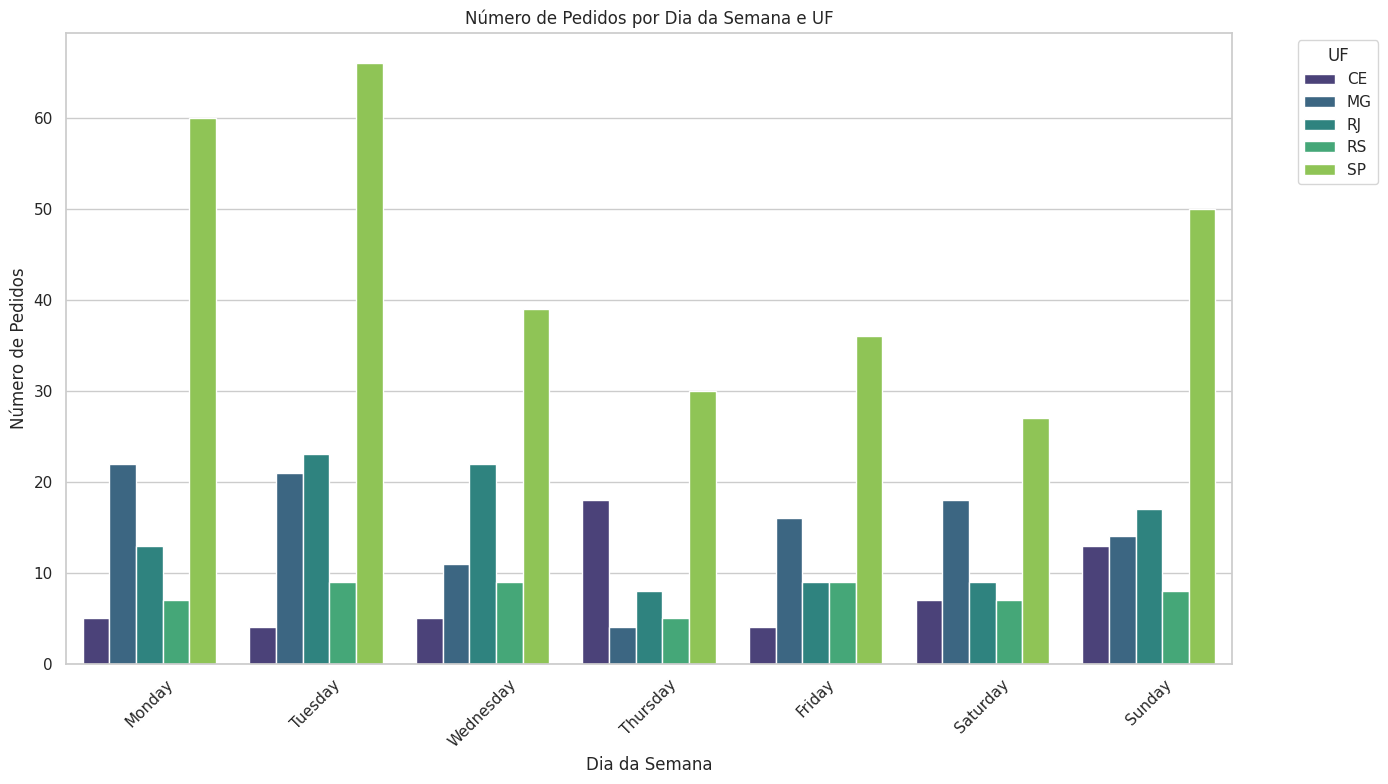

In [32]:
df_filtrado = df[df['UF'].isin(maiores_ufs)].copy()

df_filtrado['DATA_PEDIDO'] = pd.to_datetime(df_filtrado['DATA_PEDIDO'])
df_filtrado['DIA_DA_SEMANA'] = df_filtrado['DATA_PEDIDO'].dt.day_name()

# Definindo as categorias dos dias da semana na ordem desejada
categorias_dia = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Ordenando os dias da semana conforme definido em categorias_dia
df_filtrado['DIA_DA_SEMANA'] = pd.Categorical(df_filtrado['DIA_DA_SEMANA'], categories=categorias_dia, ordered=True)

# Preparando os dados: agregando por UF e Dia da Semana para simplificar
pedidos_por_uf_dia = df_filtrado.groupby(['UF', 'DIA_DA_SEMANA'])['ID_PEDIDO'].count().reset_index()

# Usando Seaborn para criar o gráfico de barras agrupadas
plt.figure(figsize=(14, 8))
sns.barplot(x='DIA_DA_SEMANA', y='ID_PEDIDO', hue='UF', data=pedidos_por_uf_dia, palette='viridis')

plt.title('Número de Pedidos por Dia da Semana e UF')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45)
plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

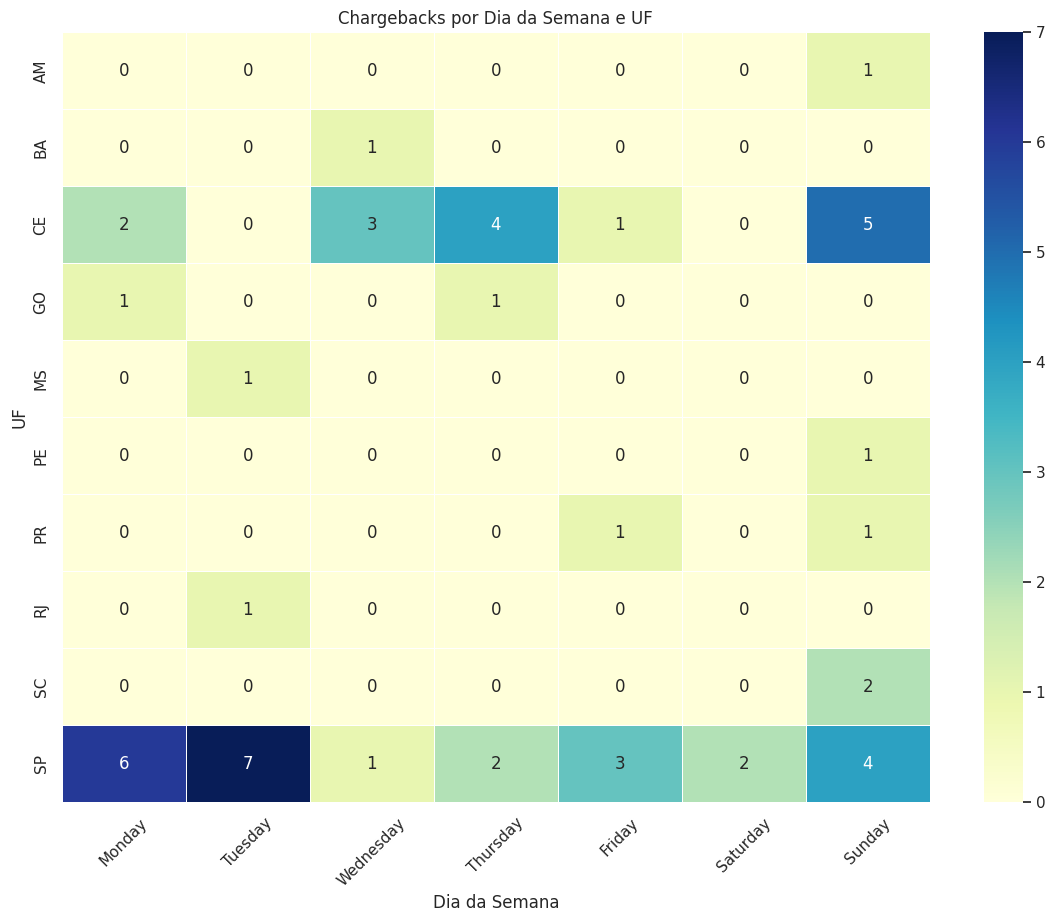

In [33]:
df['DATA_PEDIDO'] = pd.to_datetime(df['DATA_PEDIDO'])

# Criando a coluna 'DIA_DA_SEMANA' baseada em 'DATA_PEDIDO'
df['DIA_DA_SEMANA'] = df['DATA_PEDIDO'].dt.day_name()

# Selecionando apenas registros com chargeback
df_chargeback = df[df['CHARGEBACK'] == 1].copy()

# Agregando por UF e Dia da Semana para chargebacks
chargebacks_por_uf_dia = df_chargeback.groupby(['UF', 'DIA_DA_SEMANA'])['CHARGEBACK'].count().unstack(fill_value=0)

# Definindo as categorias dos dias da semana na ordem correta para garantir a ordenação adequada no heatmap
categorias_dia = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
chargebacks_por_uf_dia = chargebacks_por_uf_dia.reindex(columns=categorias_dia)

# Criando o heatmap com todos os estados
plt.figure(figsize=(14, 10))  # Ajustando o tamanho para acomodar todos os estados
sns.heatmap(chargebacks_por_uf_dia, annot=True, cmap="YlGnBu", fmt="d", linewidths=.5)

plt.title('Chargebacks por Dia da Semana e UF')
plt.xlabel('Dia da Semana')
plt.ylabel('UF')
plt.xticks(rotation=45)
plt.show()

## Análise por Emissor

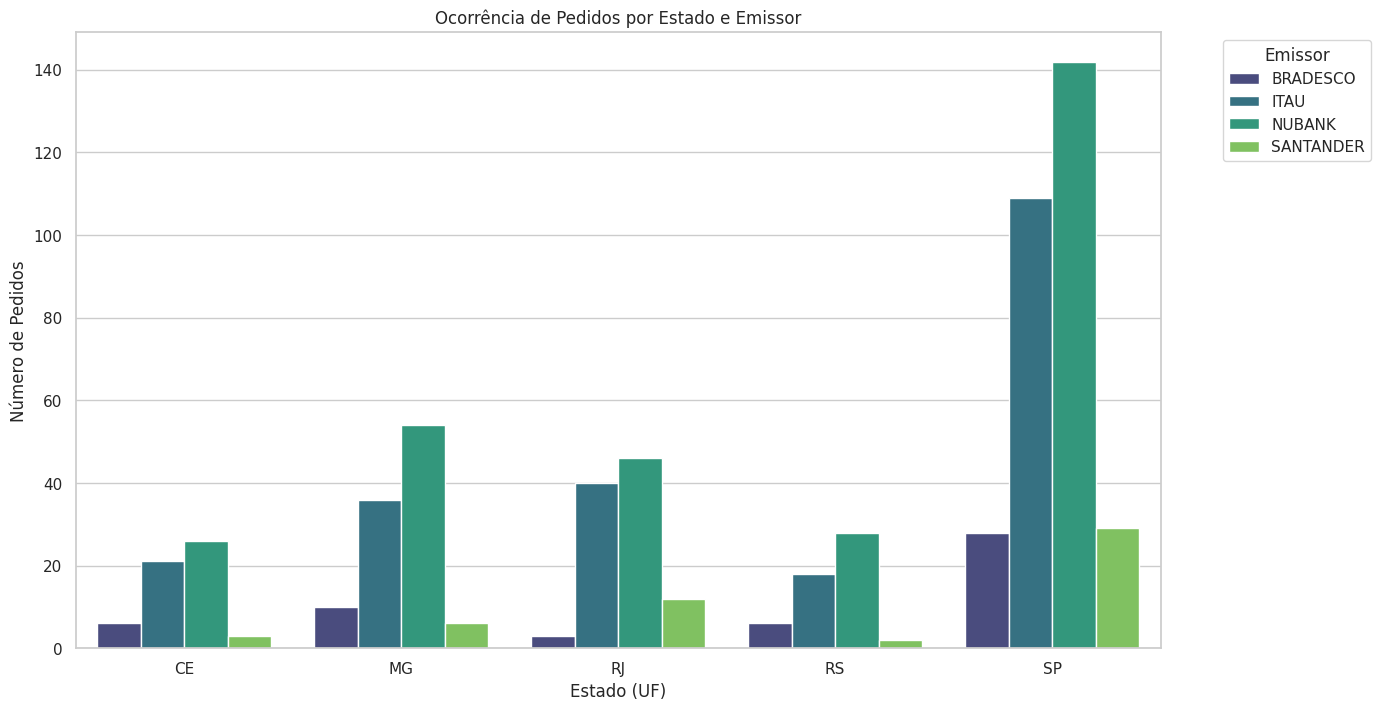

In [34]:
# Selecionando os maiores Estados
maiores_estados = ['SP', 'RJ', 'MG', 'CE', 'RS']
df_filtrado = df[df['UF'].isin(maiores_estados)]

# Agrupando UF e Emissor
pedidos_por_uf_emissor = df_filtrado.groupby(['UF', 'EMISSOR']).size().reset_index(name='NUM_PEDIDOS')

#Plotando em único gráfico
plt.figure(figsize=(14, 8))
sns.barplot(x='UF', y='NUM_PEDIDOS', hue='EMISSOR', data=pedidos_por_uf_emissor, palette='viridis')

plt.title('Ocorrência de Pedidos por Estado e Emissor')
plt.xlabel('Estado (UF)')
plt.ylabel('Número de Pedidos')
plt.legend(title='Emissor', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

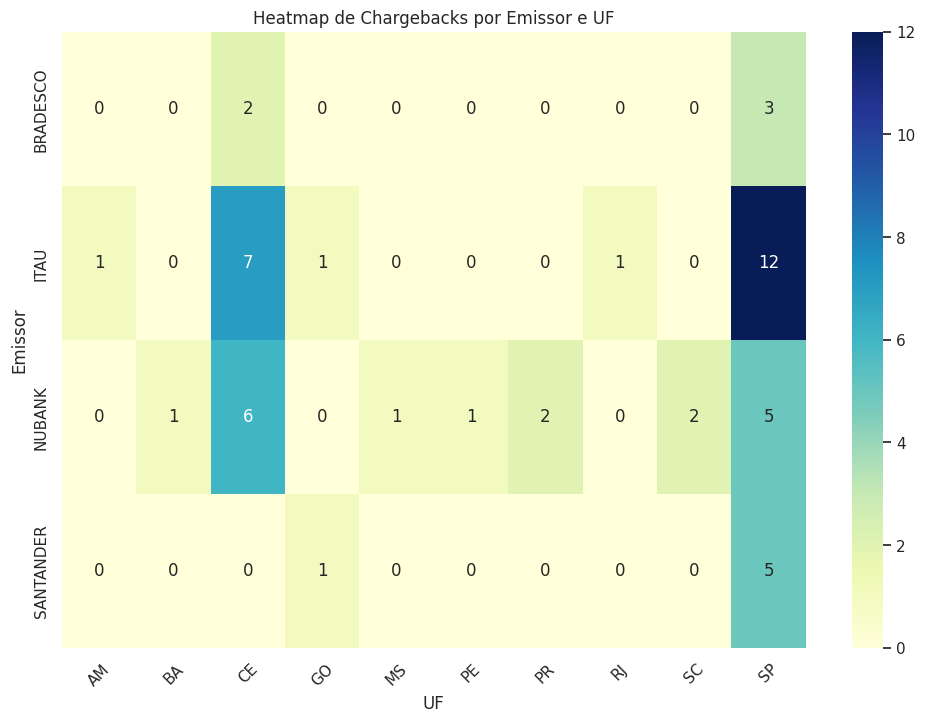

In [35]:
df_chargeback = df[df['CHARGEBACK'] == 1]

# Agrupando por 'EMISSOR' e 'UF', contando o número de chargebacks
chargeback_por_emissor_uf = df_chargeback.groupby(['EMISSOR', 'UF']).size().unstack(fill_value=0)

# Plotando o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(chargeback_por_emissor_uf, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Heatmap de Chargebacks por Emissor e UF')
plt.xlabel('UF')
plt.ylabel('Emissor')
plt.xticks(rotation=45)
plt.show()


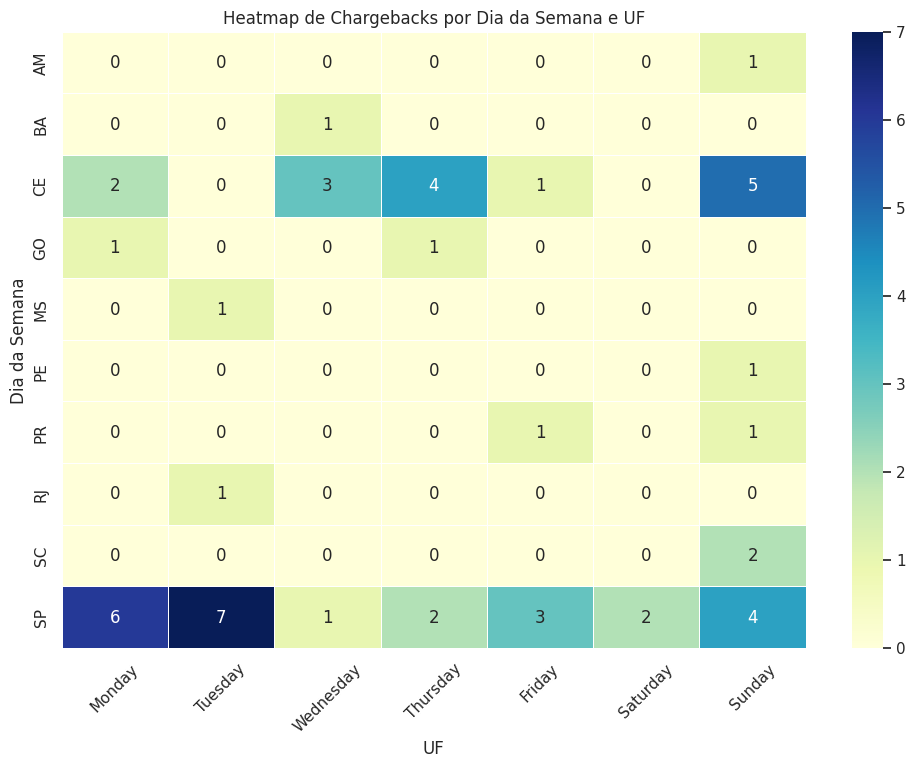

In [36]:
# Registros com chargeback
df_chargeback = df[df['CHARGEBACK'] == 1].copy()

# Convertendo 'DATA_PEDIDO' para datetime
df_chargeback['DATA_PEDIDO'] = pd.to_datetime(df_chargeback['DATA_PEDIDO'])

# Adicionando uma nova coluna para o dia da semana
df_chargeback['DIA_DA_SEMANA'] = df_chargeback['DATA_PEDIDO'].dt.day_name()

# Chargeback por dia da semana
dias = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_chargeback['DIA_DA_SEMANA'] = pd.Categorical(df_chargeback['DIA_DA_SEMANA'], categories=dias, ordered=True)

# Ocorrências de chargeback por UF e Dia da Semana
chargeback_por_uf_dia = df_chargeback.groupby(['UF', 'DIA_DA_SEMANA']).size().unstack(fill_value=0)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(chargeback_por_uf_dia, annot=True, cmap="YlGnBu", fmt="d", linewidths=.5)

plt.title('Heatmap de Chargebacks por Dia da Semana e UF')
plt.xlabel('UF')
plt.ylabel('Dia da Semana')
plt.xticks(rotation=45)
plt.show()

## Análise de chargeback por dia

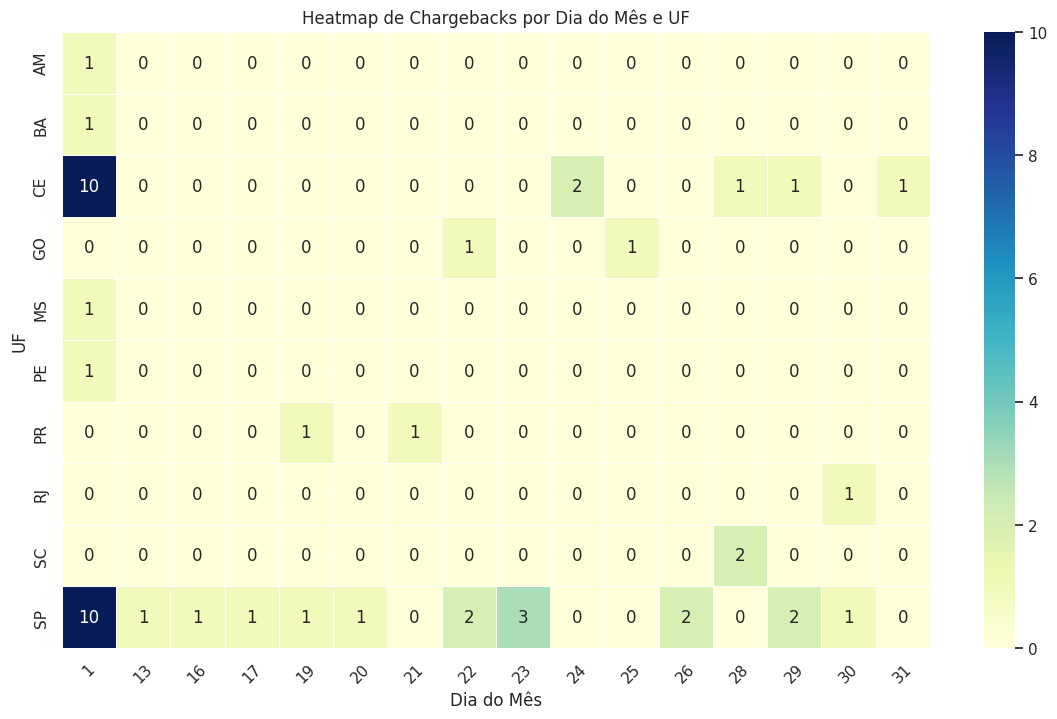

In [37]:
df['DATA_PEDIDO'] = pd.to_datetime(df['DATA_PEDIDO'])

# Adicionando uma nova coluna para o dia do mês
df['DIA_DO_MES'] = df['DATA_PEDIDO'].dt.day

# Selecionando os registros com chargeback
df_chargeback = df[df['CHARGEBACK'] == 1].copy()

# Ajustando novamente a UF 'rji' para 'RJ', anteriormente apresentou erro
substituicoes_uf = {'rji': 'RJ'}
df_chargeback['UF'] = df_chargeback['UF'].replace(substituicoes_uf)

# Ocorrências de chargeback por UF e Dia do Mês
chargeback_por_uf_dia = df_chargeback.groupby(['UF', 'DIA_DO_MES']).size().unstack(fill_value=0)

# Plotando o heatmap
plt.figure(figsize=(14, 8))  # Ajuste o tamanho conforme necessário
sns.heatmap(chargeback_por_uf_dia, annot=True, cmap="YlGnBu", fmt="d", linewidths=.5)

plt.title('Heatmap de Chargebacks por Dia do Mês e UF')
plt.xlabel('Dia do Mês')
plt.ylabel('UF')
plt.xticks(rotation=45)
plt.show()


Atráves da análise de concentração de ocorrências de chargeback por data é possível identificar alguns pontos críticos;

*   O Estado CE apresenta 10 ocorrências no dia 01, com concentração de 66% de incidência. As demais ocorrências ocorrem após o dia 24.

*   O Estado SP apresenta 10 ocorrências no dia 01, com concentração de 40% de incidência. As demais ocorrências são distribuídas ao longo da segunda semana do mês e aumentando a frequência para o final do mês.



<ipython-input-38-97e221a353cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chargeback['UF'] = df_chargeback['UF'].replace(substituicoes_uf)


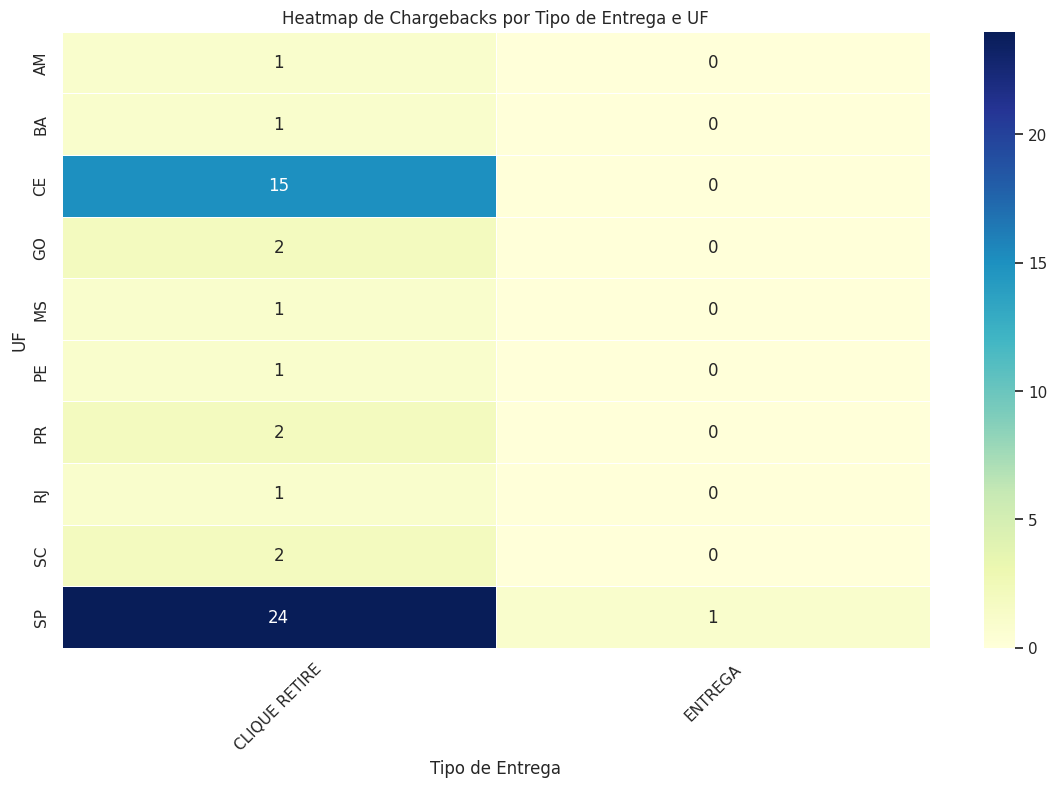

In [38]:
df_chargeback = df[df['CHARGEBACK'] == 1]

# Ajustando novamente a UF 'rji' para 'RJ', se necessário
substituicoes_uf = {'rji': 'RJ'}
df_chargeback['UF'] = df_chargeback['UF'].replace(substituicoes_uf)

# Ocorrências de chargeback por UF e Tipo de Entrega
chargeback_por_uf_tipo_entrega = df_chargeback.groupby(['UF', 'TIPO_ENTREGA']).size().unstack(fill_value=0)

# Plotando o heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(chargeback_por_uf_tipo_entrega, annot=True, cmap="YlGnBu", fmt="d", linewidths=.5)

plt.title('Heatmap de Chargebacks por Tipo de Entrega e UF')
plt.xlabel('Tipo de Entrega')
plt.ylabel('UF')
plt.xticks(rotation=45)
plt.show()

## Identificação do peso das variáveis



*   Vamos partir da premissa que o chargeback é a variável dependente

*   Testar modelos








In [39]:
print(df.columns)

Index(['ID_PEDIDO', 'MARCA', 'VALOR', 'DATA_PEDIDO', 'UF', 'BANDEIRA',
       'EMISSOR', 'TIPO_ENTREGA', 'CHARGEBACK', 'CANAL_VENDA', 'DATA', 'HORA',
       'SEMANA', 'TURNO', 'DIA_DA_SEMANA', 'DIA_DO_MES'],
      dtype='object')


In [40]:
df.head()

,ID_PEDIDO,MARCA,VALOR,DATA_PEDIDO,UF,BANDEIRA,EMISSOR,TIPO_ENTREGA,CHARGEBACK,CANAL_VENDA,DATA,HORA,SEMANA,TURNO,DIA_DA_SEMANA,DIA_DO_MES
0,35,BOTICARIO,"200,07",2024-01-01 10:38:34,MG,ELO,ITAU,ENTREGA,0,SITE,2024-01-01,10,2024-01-01/2024-01-07,Manhã,Monday,1
1,508,BOTICARIO,"276,7",2024-01-01 11:50:23,MG,MASTER,BRADESCO,CLIQUE RETIRE,0,SITE,2024-01-01,11,2024-01-01/2024-01-07,Manhã,Monday,1
2,878,BOTICARIO,"166,81",2024-01-01 14:19:53,MG,VISA,NUBANK,CLIQUE RETIRE,0,SITE,2024-01-01,14,2024-01-01/2024-01-07,Tarde,Monday,1
3,863,BOTICARIO,"219,87",2024-01-01 16:03:35,RS,VISA,ITAU,CLIQUE RETIRE,0,SITE,2024-01-01,16,2024-01-01/2024-01-07,Tarde,Monday,1
4,950,BOTICARIO,"209,9",2024-01-01 17:32:40,SP,MASTER,NUBANK,CLIQUE RETIRE,0,SITE,2024-01-01,17,2024-01-01/2024-01-07,Tarde,Monday,1


## Regras de pontuação

Uma das alternativas é estabelecer um sistema de pontuação para todas as transação, segundo o comportamento de risco atribuído através da análise de chargeback

Regras de negócio:
* UF SP: Atribuir 1 ponto quando a transação for feita nessa UF;

* Turno tarde: Atribuir 1 ponto quando a transação for feita nesse turno;

* Turno noite: Atribuir 1 ponto quando a transação for feita nesse turno quando for registrado no CE e/ou SP;

* Data: 01 à 5 na UF SP e/ou CE atribuir 1 ponto;

* Data: 24 à 31 na UF CE atribuir 1 ponto;

* Data: 22 à 31 na UF SP atribuir 1 ponto;

* Dia da semana: monday e na UF SP atribuir 1 ponto;

* Dia da semana: tuesday e na UF SP atribuir 1 ponto;

* Dia da semana: sunday e na UF SP e/ou CE atribuir 1 ponto;

* Dia da semana: wednesday e na UF CE atribuir 1 ponto;

* Dia da semana:thursday na UF CE atribuir 1 ponto;

* Emissor Itaú na UF SP 1 ponto;

* Emissor Itaú e/ou Nubank na UF CE 1 ponto;

In [41]:
# Preparaação dos dados conforme as regras
df['DATA_PEDIDO'] = pd.to_datetime(df['DATA_PEDIDO'])
df['DIA_DO_MES'] = df['DATA_PEDIDO'].dt.day
df['DIA_DA_SEMANA'] = df['DATA_PEDIDO'].dt.day_name()
df['HORA'] = df['DATA_PEDIDO'].dt.hour

In [42]:
df.head()

,ID_PEDIDO,MARCA,VALOR,DATA_PEDIDO,UF,BANDEIRA,EMISSOR,TIPO_ENTREGA,CHARGEBACK,CANAL_VENDA,DATA,HORA,SEMANA,TURNO,DIA_DA_SEMANA,DIA_DO_MES
0,35,BOTICARIO,"200,07",2024-01-01 10:38:34,MG,ELO,ITAU,ENTREGA,0,SITE,2024-01-01,10,2024-01-01/2024-01-07,Manhã,Monday,1
1,508,BOTICARIO,"276,7",2024-01-01 11:50:23,MG,MASTER,BRADESCO,CLIQUE RETIRE,0,SITE,2024-01-01,11,2024-01-01/2024-01-07,Manhã,Monday,1
2,878,BOTICARIO,"166,81",2024-01-01 14:19:53,MG,VISA,NUBANK,CLIQUE RETIRE,0,SITE,2024-01-01,14,2024-01-01/2024-01-07,Tarde,Monday,1
3,863,BOTICARIO,"219,87",2024-01-01 16:03:35,RS,VISA,ITAU,CLIQUE RETIRE,0,SITE,2024-01-01,16,2024-01-01/2024-01-07,Tarde,Monday,1
4,950,BOTICARIO,"209,9",2024-01-01 17:32:40,SP,MASTER,NUBANK,CLIQUE RETIRE,0,SITE,2024-01-01,17,2024-01-01/2024-01-07,Tarde,Monday,1


In [43]:
# Classificação dos turnos
def classificar_turno(hora):
    if 6 <= hora < 12:
        return 'Manhã'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora <= 23:
        return 'Noite'
    else:
        return 'Madrugada'
df['TURNO'] = df['HORA'].apply(classificar_turno)

In [44]:
df.head()

,ID_PEDIDO,MARCA,VALOR,DATA_PEDIDO,UF,BANDEIRA,EMISSOR,TIPO_ENTREGA,CHARGEBACK,CANAL_VENDA,DATA,HORA,SEMANA,TURNO,DIA_DA_SEMANA,DIA_DO_MES
0,35,BOTICARIO,"200,07",2024-01-01 10:38:34,MG,ELO,ITAU,ENTREGA,0,SITE,2024-01-01,10,2024-01-01/2024-01-07,Manhã,Monday,1
1,508,BOTICARIO,"276,7",2024-01-01 11:50:23,MG,MASTER,BRADESCO,CLIQUE RETIRE,0,SITE,2024-01-01,11,2024-01-01/2024-01-07,Manhã,Monday,1
2,878,BOTICARIO,"166,81",2024-01-01 14:19:53,MG,VISA,NUBANK,CLIQUE RETIRE,0,SITE,2024-01-01,14,2024-01-01/2024-01-07,Tarde,Monday,1
3,863,BOTICARIO,"219,87",2024-01-01 16:03:35,RS,VISA,ITAU,CLIQUE RETIRE,0,SITE,2024-01-01,16,2024-01-01/2024-01-07,Tarde,Monday,1
4,950,BOTICARIO,"209,9",2024-01-01 17:32:40,SP,MASTER,NUBANK,CLIQUE RETIRE,0,SITE,2024-01-01,17,2024-01-01/2024-01-07,Tarde,Monday,1


In [45]:
# Aplicação das regras de negócio
def calcular_pontuacao(row):
    pontuacao = 0
    # Regras para UF SP
    if row['UF'] == 'SP':
        pontuacao += 1
        if row['TURNO'] == 'tarde' or row['TURNO'] == 'noite':
            pontuacao += 1
        if 1 <= row['DIA_DO_MES'] <= 5 or 22 <= row['DIA_DO_MES'] <= 31:
            pontuacao += 1
        if row['DIA_DA_SEMANA'] in ['Monday', 'Tuesday', 'Sunday']:
            pontuacao += 1
        if row['EMISSOR'] == 'Itaú':
            pontuacao += 1

    # Regras adicionais para UF CE
    if row['UF'] == 'CE':
        if row['TURNO'] == 'tarde' or row['TURNO'] == 'noite':
            pontuacao += 1
        if 1 <= row['DIA_DO_MES'] <= 5 or 24 <= row['DIA_DO_MES'] <= 31:
            pontuacao += 1
        if row['DIA_DA_SEMANA'] in ['Sunday', 'Wednesday', 'Thursday']:
            pontuacao += 1
        if row['EMISSOR'] in ['Itaú', 'Nubank']:
            pontuacao += 1

    return pontuacao


In [46]:
df['Pontuacao'] = df.apply(calcular_pontuacao, axis=1)

In [47]:
# Todos os Estados
Soma_estado = df.groupby('UF')['Pontuacao'].sum()

tabela_pontuacoes = Soma_estado.reset_index()

# Renomeando
tabela_pontuacoes.columns = ['UF', 'Total de Pontuação']

# Exibindo a tabela
print(tabela_pontuacoes)


    UF  Total de Pontuação
0   AC                   0
1   AL                   0
2   AM                   0
3   BA                   0
4   CE                  90
5   DF                   0
6   ES                   0
7   GO                   0
8   MA                   0
9   MG                   0
10  MS                   0
11  MT                   0
12  PA                   0
13  PB                   0
14  PE                   0
15  PI                   0
16  PR                   0
17  RJ                   0
18  RN                   0
19  RO                   0
20  RS                   0
21  SC                   0
22  SE                   0
23  SP                 716
24  TO                   0


In [48]:
# Maiores Estados
soma_pontuacoes_por_estado = df.groupby('UF')['Pontuacao'].sum()
top_5_estados = soma_pontuacoes_por_estado.nlargest(5).index
df_top_5 = df[df['UF'].isin(top_5_estados)]

# Pontuação por Estado
pontuacao_por_estado = df_top_5.groupby(['UF', 'Pontuacao']).size().reset_index(name='Contagem')
pontuacao_por_estado_pivot = pontuacao_por_estado.pivot(index='Pontuacao', columns='UF', values='Contagem').fillna(0)

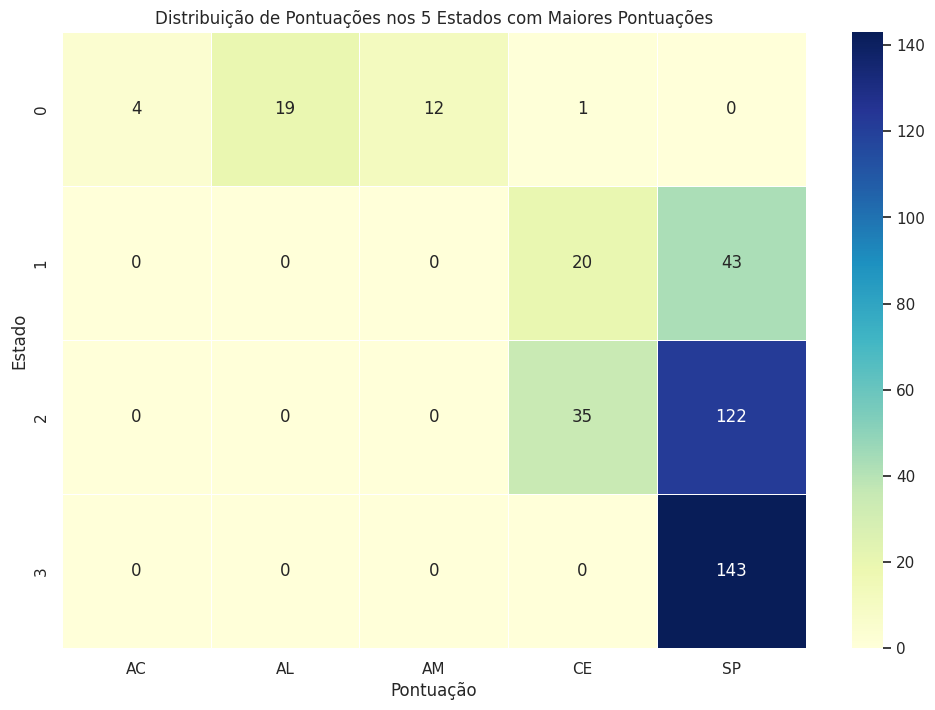

In [49]:
# Gráfico

pontuacao_por_estado_pivot = pontuacao_por_estado_pivot.astype(int)

# Gráfico
plt.figure(figsize=(12, 8))
sns.heatmap(pontuacao_por_estado_pivot, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Distribuição de Pontuações nos 5 Estados com Maiores Pontuações')
plt.xlabel('Pontuação')
plt.ylabel('Estado')
plt.show()

In [50]:
df.columns

Index(['ID_PEDIDO', 'MARCA', 'VALOR', 'DATA_PEDIDO', 'UF', 'BANDEIRA',
       'EMISSOR', 'TIPO_ENTREGA', 'CHARGEBACK', 'CANAL_VENDA', 'DATA', 'HORA',
       'SEMANA', 'TURNO', 'DIA_DA_SEMANA', 'DIA_DO_MES', 'Pontuacao'],
      dtype='object')

In [51]:
from google.colab import drive
drive.mount('/content/drive')

# Define o caminho completo, incluindo o nome do arquivo CSV que você deseja salvar
caminho_completo = '/content/drive/My Drive/Case_GB_Prev_fraude/bd_fraude.csv'

# Salva o DataFrame como CSV no caminho especificado
df.to_csv(caminho_completo, index=False)



Mounted at /content/drive


## Árvore de decisão

O objetivo é utilizar a variável "pontuação" para criar um modelo preditivo de transação fraudulenta, levando em consideração toda a base de dados disponível.

In [52]:
# Importando as bibliotecas de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [53]:
# Convertendo 'VALOR' para numérico
df['VALOR'] = pd.to_numeric(df['VALOR'], errors='coerce')

In [54]:
# tratando valores nulos
df.fillna(0, inplace=True)

In [55]:
# tratando variáveis categóricas com LabelEncoder
labelencoder = LabelEncoder()
variaveis_categoricas = ['MARCA', 'UF', 'BANDEIRA', 'EMISSOR', 'TIPO_ENTREGA', 'CANAL_VENDA', 'SEMANA', 'TURNO', 'DIA_DA_SEMANA']

for col in variaveis_categoricas:
    df[col] = labelencoder.fit_transform(df[col])

In [56]:
# Definindo X e y
X = df.drop(['ID_PEDIDO', 'Pontuacao', 'DATA_PEDIDO', 'DATA', 'HORA', 'DIA_DO_MES', 'CHARGEBACK'], axis=1)
y = df['Pontuacao']

# Conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
# Árvore de decisão
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Avaliação do modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9833333333333333
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       191
           1       0.94      0.83      0.88        18
           2       0.95      1.00      0.98        41
           3       0.98      1.00      0.99        50

    accuracy                           0.98       300
   macro avg       0.97      0.96      0.96       300
weighted avg       0.98      0.98      0.98       300



## Analisando os principais indicadores:



*   Acuracidade: O modelo tem uma acuracidade de 99,6%;

*   Precisão: Identificado uma precisão de 100% de acerto para classe 1.

*   Recall: Identificado uma taxa de acerto de 94% na classe 1.

*   F1-score: Apresenta um bom número de 97%;

Será necessário testar a performance de outros tipos de modelos.



In [90]:
preds_dt = DecisionTreeClassifier(random_state=42)
preds_dt.fit(X_test, y_test)
preds_dt = modelo.predict(X_test)

## Gradient Boosting

In [60]:
# Importando as bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [61]:
# tratando variáveis categóricas com LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = ['MARCA', 'UF', 'BANDEIRA', 'EMISSOR', 'TIPO_ENTREGA', 'CANAL_VENDA', 'SEMANA', 'TURNO', 'DIA_DA_SEMANA']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))


In [62]:
# Convertendo 'VALOR' para numérico
df['VALOR'] = pd.to_numeric(df['VALOR'], errors='coerce').fillna(0)

In [63]:
# Definindo X e y
X = df.drop(['ID_PEDIDO', 'DATA_PEDIDO', 'DATA', 'HORA', 'DIA_DO_MES', 'CHARGEBACK', 'Pontuacao'], axis=1)
y = df['Pontuacao']

# Conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
# Gradient Boosting
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = gb_classifier.predict(X_test)

# Avaliando o modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9866666666666667
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       191
           1       1.00      0.83      0.91        18
           2       0.95      0.98      0.96        41
           3       0.98      1.00      0.99        50

    accuracy                           0.99       300
   macro avg       0.98      0.95      0.97       300
weighted avg       0.99      0.99      0.99       300



In [65]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
preds_gb = gb_model.predict(X_test)

## Analisando os principais indicadores:

*  Acuracidade: O modelo tem uma acuracidade de 99,3%;

*  Precisão: Identificado uma precisão de 100% de acerto para classe 1.

*  Recall: Identificado uma taxa de acerto de 89% na classe 1.

*  F1-score: Apresenta um bom número de 94%;

## Random Forest

In [75]:
# Importando a biblioteca
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [77]:
# tratando variáveis categóricas com LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = ['MARCA', 'UF', 'BANDEIRA', 'EMISSOR', 'TIPO_ENTREGA', 'CANAL_VENDA', 'SEMANA', 'TURNO', 'DIA_DA_SEMANA']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))


In [78]:
# Convertendo 'VALOR' para numérico
df['VALOR'] = pd.to_numeric(df['VALOR'], errors='coerce').fillna(0)

In [69]:
# Definindo X e y
X = df.drop(['ID_PEDIDO', 'DATA_PEDIDO', 'DATA', 'HORA', 'DIA_DO_MES', 'CHARGEBACK', 'Pontuacao'], axis=1)
y = df['Pontuacao']

# Conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = rf_classifier.predict(X_test)

# Avaliando o modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9166666666666666
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       191
           1       0.75      0.67      0.71        18
           2       0.77      0.73      0.75        41
           3       0.89      0.96      0.92        50

    accuracy                           0.92       300
   macro avg       0.84      0.83      0.84       300
weighted avg       0.91      0.92      0.92       300



In [71]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
preds_rf = rf_model.predict(X_test)

## Analisando os principais indicadores:

*  Acuracidade: O modelo tem uma acuracidade de 92%;

*  Precisão: Identificado uma precisão de 71% de acerto para classe 1.

*  Recall: Identificado uma taxa de acerto de 56% na classe 1.

*  F1-score: Apresenta um bom número de 63%.

# Comparação entre os modelos

*  A performance do Random Forest não foi adequada para o padrão dos dados e necessidade do time de negócio, por esse motivo, não será utilizada.

*  Ambas as modelagens apresentam um nível de acurácia bom, o Gradient Boost se destaca pelo maior número de precisão e F1-Score.

* Sugiro realizar um novo treino e teste com pelo menos 6 meses de dados e retornar ao processo de avaliação dos modelos.



## Utilizando visão gráfica

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Modelos
dt_model = DecisionTreeClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Treinamento
dt_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Previsões
preds_dt = dt_model.predict(X_test)
preds_gb = gb_model.predict(X_test)
preds_rf = rf_model.predict(X_test)

# Calculando métricas
metrics = {}
for model_name, preds in [('DT', preds_dt), ('GB', preds_gb), ('RF', preds_rf)]:
    metrics[model_name] = {
        'Accuracy': accuracy_score(y_test, preds),
        'Precision': precision_score(y_test, preds, average='macro'),
        'F1-Score': f1_score(y_test, preds, average='macro')
    }


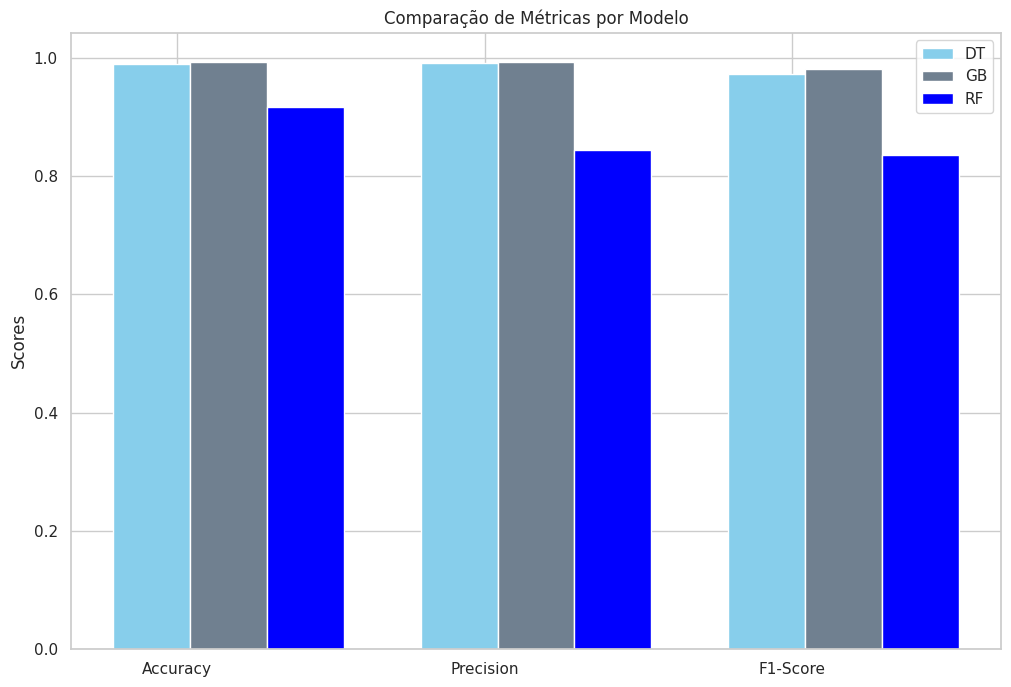

In [94]:
# Preparando os dados para o gráfico
labels = list(metrics['DT'].keys())
num_models = len(metrics)
x = np.arange(len(labels))
width = 0.25

colors = ['skyblue', 'slategrey', 'blue']

fig, ax = plt.subplots(figsize=(12, 8))
for i, (model_name, vals) in enumerate(metrics.items()):
     ax.bar(x + i * width, vals.values(), width, label=model_name, color=colors[i])

# Adicionando algumas personalizações
ax.set_ylabel('Scores')
ax.set_title('Comparação de Métricas por Modelo')
ax.set_xticks(x + width / num_models)
ax.set_xticklabels(labels)
ax.legend()